<a href="https://colab.research.google.com/github/santhosh201cali/fmml2021/blob/main/FMML_CLF1_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-2 : Implement KNN from scratch and visualize algo. performance
#### Module Coordinator: Sahil Manoj Bhatt

NOTE: YOU ONLY NEED TO MAKE CHANGES/WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---



## KNN

In the last lab, you learnt distance metrics and their importance in classification algorithms. You also saw how the KNN algorithm works for two cases: i) a synthetic dataset and ii) a real-world Iris dataset.  

However, the question still remains: *What is KNN?*  
### What is KNN ?

K-NN (K- Nearest Neighbours) is a classification technique where the output is a class membership.  
An object is classified by a **plurality vote of its neighbors**, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.  

### What is so unique about KNN ?  
First off, KNN is a **supervised learning** algorithm, ie, the idea is to learn a function that can map an input to an output given some example pairs.  

It is a **non-parametric** algorithm, since it doesn't assume anything about the form of the mapping function, which makes it very flexible to use. Certain algorithms are parametric (such as Naive Bayes), which are constrained as they require a specified form. KNN can, thus, be a good algorithm to try if the form is unknown.  

Moreover, KNN is an **instance-based algorithm**, since it compares new problems/inputs with those which were seen during model training and that were stored in memory.  

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score#, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn import preprocessing
from collections import Counter
from sklearn.preprocessing import StandardScaler
import warnings

In [3]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]
    # return k_nearest_neighbours and distances(1)[0][0]


In [10]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

# **Iris Dataset**

Download the Dataset

In [4]:
# Upload the Iris data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


Explore the Dataset

In [5]:
df = pd.read_csv('iris.csv')
df = df.drop(columns='Id')
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

As you can see above, the last column consists of strings as classes. These need to be converted into appropriate numerical classes. For this, you can use the Label encoder module provided by scikit-learn.  

In [6]:
le = preprocessing.LabelEncoder()
orig_species = df['Species']
le.fit(df['Species'])
df['Species']=le.transform(df['Species'])
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0              5.1           3.5            1.4           0.2        0
1              4.9           3.0            1.4           0.2        0
2              4.7           3.2            1.3           0.2        0
3              4.6           3.1            1.5           0.2        0
4              5.0           3.6            1.4           0.2        0
..             ...           ...            ...           ...      ...
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

[150 rows x 5 columns]

In [7]:
X = np.array(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
y = np.array(df['Species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [11]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [12]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


In [13]:
## TASK-1
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    # return Counter(targets).most_common(1)[0][0]
    return k_nearest_neighbours and distances(1)[0][0]

## Visualizing Data  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other. 

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [14]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

[[5.1, 3.5], [4.9, 3.0], [4.7, 3.2], [4.6, 3.1], [5.0, 3.6], [5.4, 3.9], [4.6, 3.4], [5.0, 3.4], [4.4, 2.9], [4.9, 3.1], [5.4, 3.7], [4.8, 3.4], [4.8, 3.0], [4.3, 3.0], [5.8, 4.0], [5.7, 4.4], [5.4, 3.9], [5.1, 3.5], [5.7, 3.8], [5.1, 3.8], [5.4, 3.4], [5.1, 3.7], [4.6, 3.6], [5.1, 3.3], [4.8, 3.4], [5.0, 3.0], [5.0, 3.4], [5.2, 3.5], [5.2, 3.4], [4.7, 3.2], [4.8, 3.1], [5.4, 3.4], [5.2, 4.1], [5.5, 4.2], [4.9, 3.1], [5.0, 3.2], [5.5, 3.5], [4.9, 3.1], [4.4, 3.0], [5.1, 3.4], [5.0, 3.5], [4.5, 2.3], [4.4, 3.2], [5.0, 3.5], [5.1, 3.8], [4.8, 3.0], [5.1, 3.8], [4.6, 3.2], [5.3, 3.7], [5.0, 3.3], [7.0, 3.2], [6.4, 3.2], [6.9, 3.1], [5.5, 2.3], [6.5, 2.8], [5.7, 2.8], [6.3, 3.3], [4.9, 2.4], [6.6, 2.9], [5.2, 2.7], [5.0, 2.0], [5.9, 3.0], [6.0, 2.2], [6.1, 2.9], [5.6, 2.9], [6.7, 3.1], [5.6, 3.0], [5.8, 2.7], [6.2, 2.2], [5.6, 2.5], [5.9, 3.2], [6.1, 2.8], [6.3, 2.5], [6.1, 2.8], [6.4, 2.9], [6.6, 3.0], [6.8, 2.8], [6.7, 3.0], [6.0, 2.9], [5.7, 2.6], [5.5, 2.4], [5.5, 2.4], [5.8, 2.7], [6.

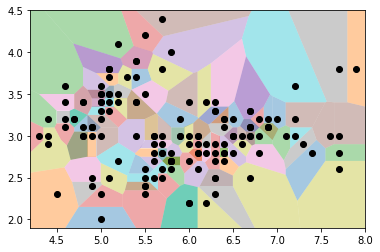

In [15]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['SepalLengthCm'])
ypts = np.array(df['SepalWidthCm'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [16]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


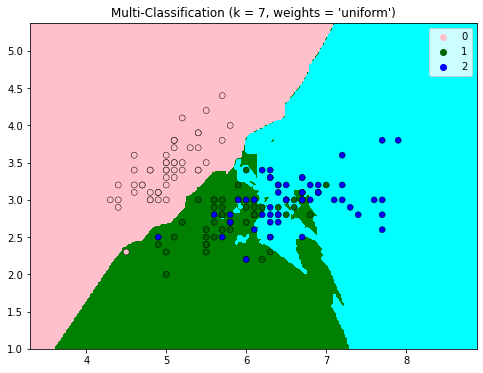

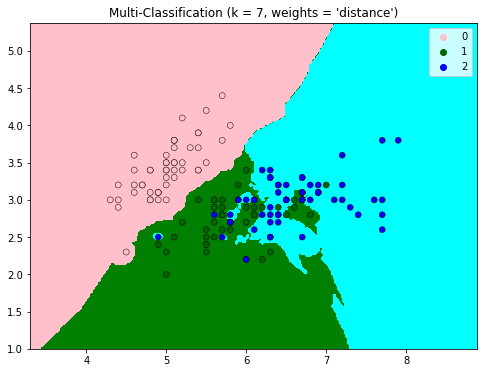

In [17]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

In [46]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions. 
## Plot the Voronoi diagram and Decision boundaries after that.
df.isnull().sum()/len(df)*100
a = df.isnull().sum()/len(df)*100
# saving column names in a variable
variables = df.columns
variable = [ ]
for i in range(0,5):
  if a[i]<=20:
    variable.append(variables[i])


## Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

[[13  0  0]
 [ 0 22  0]
 [ 0  3 12]]


Predicted   0   1   2  All
True                      
0          13   0   0   13
1           0  22   0   22
2           0   3  12   15
All        13  25  12   50

Text(0.5, 15.0, 'Predicted label')

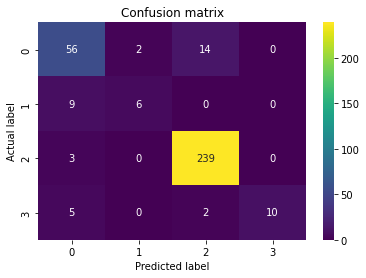

In [50]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$ 

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [28]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



# **Car Evaluation Dataset**

In [71]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation (1).csv


In [94]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

buying price maintenance cost num_doors  ... lug_boot safety decision
0           vhigh            vhigh         2  ...    small    med    unacc
1           vhigh            vhigh         2  ...    small   high    unacc
2           vhigh            vhigh         2  ...      med    low    unacc
3           vhigh            vhigh         2  ...      med    med    unacc
4           vhigh            vhigh         2  ...      med   high    unacc
...           ...              ...       ...  ...      ...    ...      ...
1722          low              low     5more  ...      med    med     good
1723          low              low     5more  ...      med   high    vgood
1724          low              low     5more  ...      big    low    unacc
1725          low              low     5more  ...      big    med     good
1726          low              low     5more  ...      big   high    vgood

[1727 rows x 7 columns]

In [95]:
for x in car_df.columns:
  print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

buying price
maintenance cost
num_doors
num_persons
lug_boot
safety
decision


buying price  maintenance cost  num_doors  ...  lug_boot  safety  decision
0                3                 3          0  ...         2       2         2
1                3                 3          0  ...         2       0         2
2                3                 3          0  ...         1       1         2
3                3                 3          0  ...         1       2         2
4                3                 3          0  ...         1       0         2
...            ...               ...        ...  ...       ...     ...       ...
1722             1                 1          3  ...         1       2         1
1723             1                 1          3  ...         1       0         3
1724             1                 1          3  ...         0       1         2
1725             1                 1          3  ...         0       2         1
1726             1                 1          3  ...         0       0         3

[1727 rows x 7 columns]

In [96]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,4])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 99.42 %


In [76]:
score

0.9942196531791907

[[107   1   0]
 [  1 118   0]
 [  0   0 119]]


Text(0.5, 51.0, 'Predicted label')

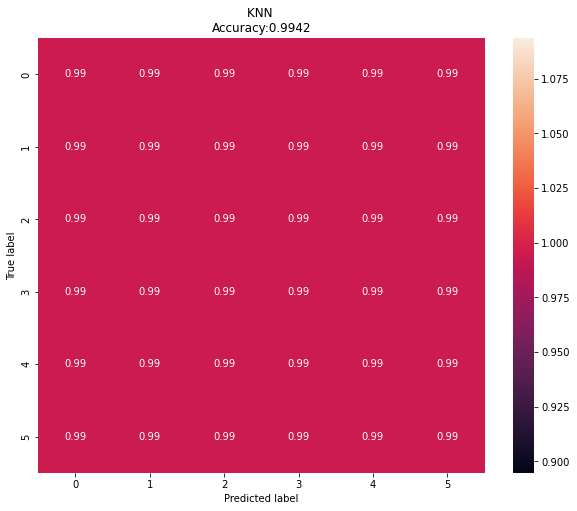

In [98]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset
print(confusion_matrix(y_test,predictions))
car_df = pd.DataFrame(score, index = [i for i in range(0,6)], columns = [i for i in range(0,6)])
plt.figure(figsize=(10,8))
sns.heatmap(car_df,annot=True)
plt.title('KNN \nAccuracy:{0:.4f}'.format(accuracy_score(y_test,predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [100]:
## TASK-4
# Print a Classification Report for the results of the Car evaluation dataset
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.99      0.99      0.99       119
           2       1.00      1.00      1.00       119

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346



### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
